## Обработка электрохимических данных для 7031 красителя. Он аналогиче 154 и 220

Подкдючение всех необходимых библиотек

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
current_palette = sns.color_palette("muted")
import matplotlib as mpl
import numpy as np
from pylab import cm
import pandas as pd
import matplotlib.font_manager
import scipy

plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [22]:
os.listdir(path)

['49 min.txt', '15 min.txt', '1 min.txt', '.ipynb_checkpoints', '27 min.txt']

In [167]:
# путь для сохранения картинок
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD7031/IMAGES/ECH'

In [120]:
os.path.exists('/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/06.08.2021 ПК220 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode +0.8 V/generation_small')

True

In [121]:
path = '/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/generation_small'
list_of_files = os.listdir(path)
list_of_files


['49 min.txt',
 '.DS_Store',
 '15 min.txt',
 '1 min.txt',
 '.ipynb_checkpoints',
 '27 min.txt']

In [41]:
np.loadtxt(os.path.normpath(path)+"/1 min.txt")

array([[ 3.1500e+02,  8.6474e-02],
       [ 3.1600e+02,  8.7009e-02],
       [ 3.1700e+02,  8.7903e-02],
       ...,
       [ 8.9800e+02, -8.3100e-04],
       [ 8.9900e+02, -8.2100e-04],
       [ 9.0000e+02, -7.9000e-04]])

In [122]:
np.loadtxt(f"Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/generation_small/1 min.txt")

OSError: Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/generation_small/1 min.txt not found.

## Generation

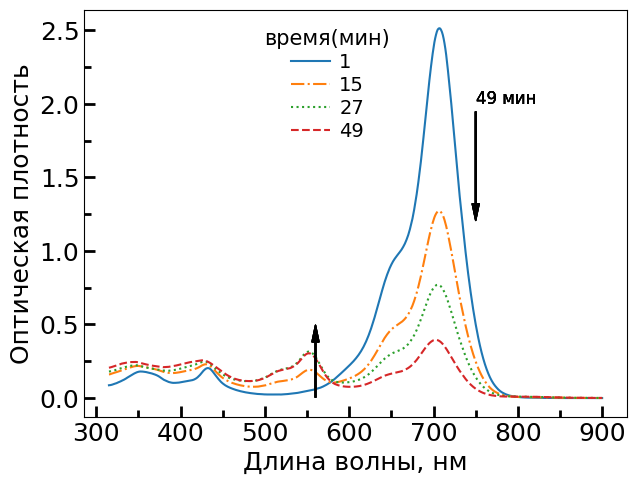

In [148]:
import os
import glob
path = '/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/generation_small'
list_of_files = os.listdir(path)

lines=[]
peaks_561 = []
peaks_714 = []
fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

ax.set_xlabel('Длина волны, нм')
ax.set_ylabel('Оптическая плотность')
#print(list_of_files)


new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
new_3 = [int(fname.split(' ')[0]) for fname in new_2]
for i, file in enumerate(new_2):            

    wavelength, signal = np.loadtxt(os.path.normpath(path)+'/'+file,unpack=True, delimiter=' ', skiprows=0)
    a = np.where(wavelength == 561)
    b = np.where(wavelength == 711)
    peaks_561.append(signal[246])
    peaks_714.append(signal[396])
    lines = ['-','-.', ':', '--']
    ax.plot(wavelength, signal,linestyle=lines[i], linewidth=1.5,label='{}'.format(str(file.split(' ')[0])))
    ax.legend(title="время(мин)",fontsize =14,title_fontsize=15, bbox_to_anchor=(0.6, 1))
    ax.annotate('49 мин', xy=(750, 1.2), xytext=(750, 2.0),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5,
                            shrink=0.01), fontsize=12)
    ax.annotate('', xy=(560, 0.5), xytext=(560, 0),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5, shrink=0.01), fontsize=12)
    #ax.text(420,2.0,'(а)',fontsize=25)
    


plt.savefig(save_fig+'/generation_rus.png', bbox_inches='tight')
plt.show()


    



здесь линия исходного красителя - 706 нм (в начальный момент времени), на конец генерации - 703 нм. Линия смещается в коротковолновую область 

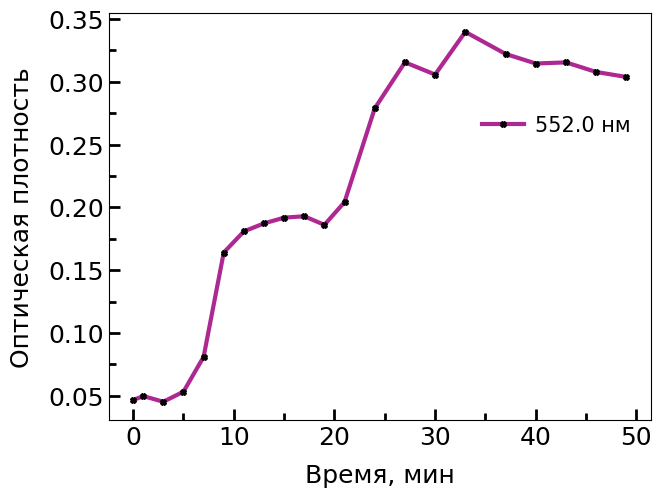

In [117]:
path = '/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/generation'
list_of_files = os.listdir(path)
list_of_files.remove('130 min.txt')
list_of_files.remove('0 min(2).txt')
lines=[]
peaks_561 = []
peaks_714 = []
new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
new_3 = [int(fname.split(' ')[0]) for fname in new_2]
for i, file in enumerate(new_2):            
    wavelength, signal = np.loadtxt(os.path.normpath(path)+'/'+file,unpack=True, delimiter=' ', skiprows=0)
    a = np.where(wavelength == 561)
    b = np.where(wavelength == 706)
    peaks_561.append(signal[237])
    peaks_714.append(signal[391])



fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))

ax.set_xlabel('Время, мин', labelpad=10)
ax.set_ylabel('Оптическая плотность', labelpad=10)

ax.plot(new_3,peaks_561, color=cm.plasma(100), marker='X',markerfacecolor='black',markeredgecolor="black" ,linewidth=3, markeredgewidth=1,
         markersize=4,label='552.0 нм')

#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(prop={'size':15},bbox_to_anchor=(1, 0.8))
#plt.savefig(save_fig+'/generation_561.png', dpi=300, transparent=False, bbox_inches='tight') 
plt.show()

Линия получается такой ломанной, из-за того что пропадал ток.

# Relaxation

In [158]:
path = '/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/relaxation'
list_of_files = os.listdir(path)
lines=[]
peaks_rel_561 = []
peaks_rel_714 = []    
relax = []
[relax.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
relax_2 = sorted(relax, key=lambda fname: int(fname.split(' ')[0]))
relax_3 = [int(fname.split(' ')[0]) for fname in relax_2]
for i, file in enumerate(relax_2):            

    wavelength, signal = np.loadtxt(f"/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/relaxation/{file}",unpack=True, delimiter=' ', skiprows=0)
    a_rel = np.where(wavelength == 552)
    b_rel = np.where(wavelength == 703)
    peaks_rel_561.append(signal[237])
    peaks_rel_714.append(signal[388])

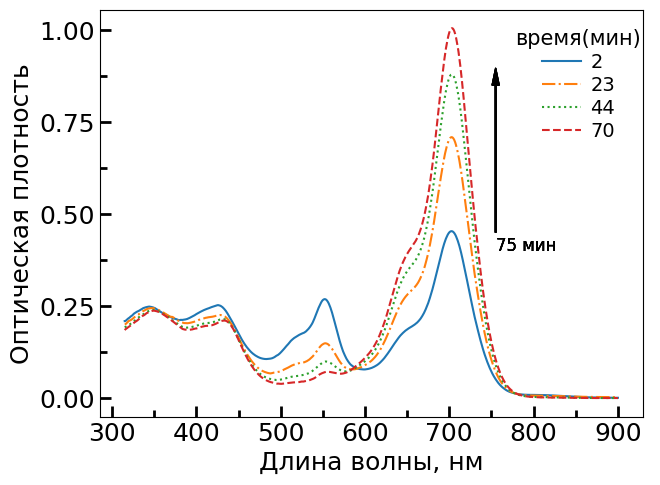

In [127]:
import os
import glob
path = '/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/relaxation_small'

list_of_files = os.listdir(path)

lines=[]
peaks_561 = []
peaks_714 = []
fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25/2))

ax.set_xlabel('Длина волны, нм')
ax.set_ylabel('Оптическая плотность')
#print(list_of_files)


new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
for i, file in enumerate(new_2):            

    wavelength, signal = np.loadtxt(f"/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/17.02.2022 16.12.2021 ПК7031 BF4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,8 V/relaxation_small/{file}",unpack=True, delimiter=' ', skiprows=0)
 
    lines = ['-','-.', ':', '--']
    ax.plot(wavelength, signal,linestyle=lines[i], linewidth=1.5,label='{}'.format(str(file.split(' ')[0])))
    ax.legend(title="время(мин)",fontsize =14,title_fontsize=15, bbox_to_anchor=(0.73, 1))
    #ax.annotate('70 min', xy=(750, 1.2), xytext=(750, 2.0),
    #        arrowprops=dict(facecolor='black',width=0.5,headwidth=5,
    #                        shrink=0.01), fontsize=12)
    ax.annotate('75 мин', xy=(755, 0.9), xytext=(755, 0.4),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5, shrink=0.01), fontsize=12)
    #ax.text(420,2.0,'(а)',fontsize=25)
    


plt.savefig(save_fig+'/relaxation_rus_color.png', bbox_inches='tight')
plt.show()


    



In [152]:
np.where(signal == 0.395296)

(array([388]),)

In [151]:
np.max(signal)

0.395296

In [153]:
wavelength[388]

703.0

In [154]:
np.max(signal[150:280])

0.303807

In [155]:
np.where(signal == 0.303807)

(array([237]),)

In [156]:
wavelength[237]

552.0

In [130]:
np.max(signal)

1.004497

In [162]:
relax_3


[2, 4, 6, 8, 10, 23, 31, 34, 41, 44, 47, 50, 54, 58, 62, 66, 70]

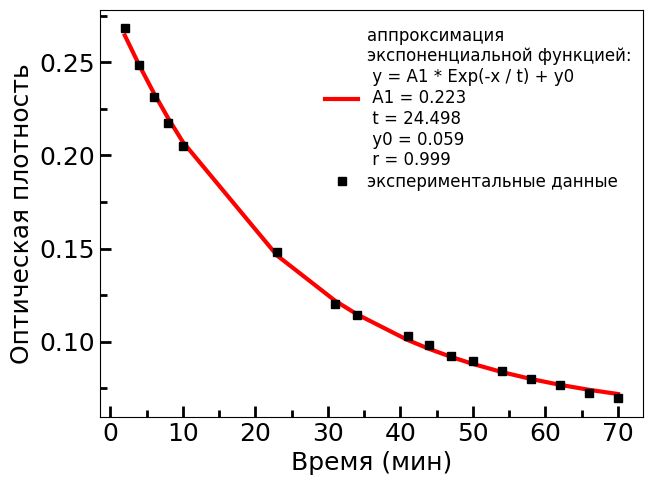

In [166]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, relax_3,peaks_rel_561, bounds=(0, [1, 100, 1]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05/2))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Оптическая плотность')

#ax.plot(relax_3,peaks_rel_561, color='lightcoral', marker='X',markerfacecolor='black',markeredgecolor='black' ,linewidth=3, markeredgewidth=2,
         #markersize=12,label='561 nm')
ax.plot(relax_3, exponenial_func_1(relax_3, *popt),linewidth= 3, color='red',
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
ax.plot(relax_3,peaks_rel_561,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(1.01, 1),fontsize =12,title_fontsize=14)
plt.savefig(save_fig+'/expfit_relax_rus.png', transparent=False, bbox_inches='tight') 
plt.show()

In [165]:
my_rho = np.corrcoef(peaks_rel_561, exponenial_func_1(relax_3, *popt))
my_rho


array([[1.        , 0.99963386],
       [0.99963386, 1.        ]])